<a href="https://colab.research.google.com/github/Gratisfo/project_ml/blob/main/%D0%91%D0%B8%D0%BD%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8%D1%8F_%D0%BD%D0%B0_%D0%BA%D0%BE%D1%80%D0%BF%D1%83%D1%81%D0%B5_imdb_%D1%80%D0%B5%D1%86%D0%B5%D0%BD%D0%B7%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: бинарная классификация на большом корпусе imdb рецензий на фильмы. 
Корпус можно скачать по ссылке http://ai.stanford.edu/~amaas/data/sentiment/

- построить и обучить классификатор
- посчитать метрики качества
- построить ROC кривую и посчитайте величину ROC AUC.  
- найти 15 самых негативных и самых позитивных рецензий по мнению модели.  

Написать свои функции, которые бы считали tp, fp, tn, fn, и возвращали точность, полноту и ф-меру и применить их к результатам, полученным вашими классификаторами (если все сделано правильно, то результаты должны совпадать с полученными  sklearn метриками). 

In [ ]:
!wget -c http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [ ]:
!tar --gunzip --extract --verbose --file=aclImdb_v1.tar.gz

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.metrics import roc_auc_score, roc_curve
import operator

In [ ]:
# создаем датасет
df_train = pd.DataFrame(columns = ['text', 'tag'])
df_test = pd.DataFrame(columns = ['text', 'tag'])

def get_df(path, df, tag):
  for t in os.listdir(str(path)):
    with open (t, encoding='utf-8') as f:
      text = f.read()
    df.loc[len(df)] = [text, tag]
    
%cd /content/aclImdb/train/neg
get_df('/content/aclImdb/train/neg', df_train, 0)
%cd /content/aclImdb/train/pos
get_df('/content/aclImdb/train/pos', df_train, 1)
%cd /content/aclImdb/test/neg
get_df('/content/aclImdb/test/neg', df_test, 0)
%cd /content/aclImdb/test/pos
get_df('/content/aclImdb/test/pos', df_test, 1)

/content/aclImdb/train/neg
/content/aclImdb/train/pos
/content/aclImdb/test/neg
/content/aclImdb/test/pos


In [ ]:
df_test.tag = df_test.tag.astype('int')
df_train.tag = df_train.tag.astype('int')

In [ ]:
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(df_train.text) 
X_train_counts.shape

(25000, 74849)

In [ ]:
# строим и обучим классификатор
clf = MultinomialNB().fit(X_train_counts, df_train.tag)
predicted = clf.predict(X_test)

In [ ]:
X_test = vectorizer.transform(df_test.text)  
print(X_test.shape)
predicted = clf.predict(X_test)

(25000, 74849)


In [ ]:
# считаем метрики качества
acc = accuracy_score(df_test.tag, predicted)
f1 = f1_score(df_test.tag, predicted)
p = precision_score(df_test.tag, predicted)
r = recall_score(df_test.tag, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(f1, p, r))

accuracy=0.8296
F1=0.8188, Precision=0.8741, Recall=0.7700


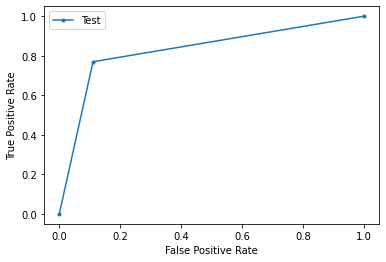

In [ ]:
# строим ROC кривую 
y_true = df_train.tag.astype('int')
y_predicted = predicted
fpr, tpr, thrhld = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# считаем величину ROC AUC
print(roc_auc_score(y_true, y_predicted))

0.82956


In [ ]:
proba = {}
for i, elem in enumerate(clf.predict_proba(X_test)):
  proba[i] = elem[0]
  
sorted_proba = sorted(proba.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
# самые позитивные рецензии
for i in sorted_proba[-14:]:
  print(df_test.text[i[0]], '\n')

From director Billy Wilder (Double Indemnity, The Seven Year Itch, Some Like It Hot), I can see that this is a bit of an under-shown and underrated film, one to be seen. This is the biographical story of Charles Augustus 'Slim' Lindbergh (James Stewart), who in 1927 wanted to be the first man to cross travel solo flight from New York, crossing the Atlantic ocean, to reach Paris, in a small cockpit. The first half hour or whatever is seeing Lindbergh getting permission to do it, and the construction of the plane, named "The Spirit of St. Louis", and making all necessary preparations. Then of course the rest sees his perilous journey crossing the journey, overcoming tiredness, near fuel loss, and moments of losing sense of direction, but he was successful. Also starring Murray Hamilton as Bud Gurney, Patricia Smith as Mirror Girl, Bartlett Robinson as Benjamin Frank Mahoney, Robert Cornthwaite as Harry Knight, Sheila Bond as Model/Dancer, Marc Connelly as Father Hussman, Arthur Space as 

In [ ]:
# самые негативные рецензии
for i in sorted_proba[:14]:
  print(df_test.text[i[0]], '\n')

This is just the same old crap that is spewed from amateur idiots who have no clue how to make a movie--gee maybe that's why it is a straight-to-video wanna-be movie!<br /><br />I guess it is my fault for actually spending money to see it (one of the worst decisions I have ever made). What a waste. I usually like B movies, some of them are actually quite good--but this is just too ridiculous and stupid to even be funny.<br /><br />The losers that made this junk deserve to be put out of business for wasting everyone's time and money making a movie that obviously doesn't even deserve to be on film! These so-called movie makers have absolutely NO talent!<br /><br />Stupid plot, horrible acting (especially the drag queens--what sicko would actually find that sexy?!), lame writing (if there even was a script--seems like the kinda bull**** someone just made up on the spot)<br /><br />What is stunning about this movie is its utter lack of anything well-done at all.<br /><br />How much attenti

In [ ]:
results = pd.DataFrame(columns=['y_true', 'y_pred'])
results.y_true = df_test.tag
results.y_pred = predicted

In [ ]:
TP = results[(results.y_true==1)&(results.y_pred==1)].shape[0]
TN = results[(results.y_true==0)&(results.y_pred==0)].shape[0]
FP = results[(results.y_true==0)&(results.y_pred==1)].shape[0]
FN = results[(results.y_true==1)&(results.y_pred==0)].shape[0]

In [ ]:
# считаем и сравниваем результаты

def accuracy():
  acc = (TP + TN) / (TP + TN + FP + FN) 
  return acc

acc_h = accuracy()
print('accuracy={0:1.4f}'.format(acc_h), '\n', acc == acc_h)

def precision():
  prec = TP/(TP + FP)
  return prec

p_h = precision()
print('precision={0:1.4f}'.format(p_h), '\n', p == p_h)

def recall():
  rec =  TP/(TP + FN)
  return rec

r_h = recall()
print('recall={0:1.4f}'.format(p_h), '\n', r == r_h)

def f_score():
  f = 2 *  precision() * recall() / (precision() + recall())
  return f
  
f1_h = f_score()
print('F1={0:1.4f}'.format(f1_h), '\n', f1 == f1_h)

accuracy=0.8296 
 True
precision=0.8741 
 True
recall=0.8741 
 True
F1=0.8188 
 True
